In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

## Understanding the problem:
build a predictive model for what sorts of people were more likely to survive the Titanic sinking.

## EDA


### Variable description

1. train
    - PassengerId : Unique id number to each passenger
    - Survived : Passenger survive(1) or died(0)
    - Pclass : Passenger class
    - Name : Name
    - Sex : Gender of passenger
    - Age : Age of passenger
    - SibSp : Number of siblings/spouses
    - Parch : Number of parents/children
    - Ticket : Ticket number
    - Fare : Amount of money spent on ticket
    - Cabin : Cabin category
    - Embarked : Port where passenger embarked

2. test
3. gender_submission: a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

In [65]:
# import the dataset
url = "https://github.com/thisisjasonjafari/my-datascientise-handcode/raw/master/005-datavisualization/titanic.csv"
s = requests.get(url).content
c = pd.read_csv(io.StringIO(s.decode('utf-8')))

# original dataset
titanic = c
gender = pd.read_csv('./gender_submission.csv')
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [97]:
# the number of missing values in each columns
train.isna().sum()

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
women = train[train['Sex']=='female']['Survived']
men = train[train['Sex']=='male']['Survived']

print("survival rate for men: ", round(men.sum()/len(men)*100,2),'%')
print("survival rate for women: ", round(women.sum()/len(women)*100,2),'%')

survival rate for men:  18.89 %
survival rate for women:  74.2 %


In [70]:
class_1 = train[train['Pclass']==1]['Survived']
class_2 = train[train['Pclass']==2]['Survived']
class_3 = train[train['Pclass']==3]['Survived']
print("survival rate for first class: ", round(class_1.sum()/len(class_1)*100,2),'%')
print("survival rate for second class: ", round(class_2.sum()/len(class_2)*100,2),'%')
print("survival rate for third class: ", round(class_3.sum()/len(class_3)*100,2),'%')

survival rate for first class:  62.96 %
survival rate for second class:  47.28 %
survival rate for third class:  24.24 %


As can be seen above, the survival rate of women is almost four times higher than that of men, at 74.2% and 18.89%, respectively. Plus, the higher passenger class was guaranteed a higher proportion of survival on Titanic. 

In [71]:
# the number of missing values in each columns
train.isna().sum()
# size of train data
train.shape

# the rate of missing values out of the total counts
round(train.isna().sum()/train.shape[1],2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            14.75
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          57.25
Embarked        0.17
dtype: float64

I decided on removing Name, Ticket and Cabin which has more than 50% of missing values since Name and Ticket are meaningless and Cabin can be caused bias.

According to the titanic dataset, there is no missing value of name column and It looked distinct. So that, I removed the double quotes and made the list for survival.

In [101]:
for i, name in enumerate(titanic['name']):
    if '"' in name:
        titanic['name'][i] = re.sub('"', '', name)
        
for i, name in enumerate(test['Name']):
    if '"' in name:
        test['Name'][i] = re.sub('"', '', name)


# titanic.loc[titanic['name'] == name]['survived'].values

In [102]:
survived = []

for name in test['Name']:
#     print(name, survived)
    survived.append(int(titanic.loc[titanic['name'] == name]['survived'].values[-1]))

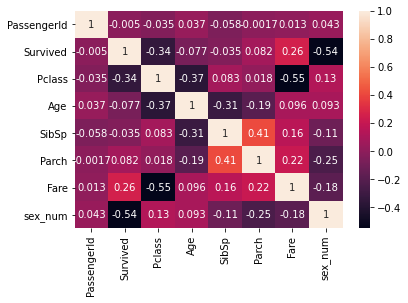

In [91]:
train['sex_num'] = train['Sex'].apply(lambda x: 0 if x=='female' else 1)
train.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
# To identify the correlation between sex and survived, this feature should be numeric

train['sex_num'] = train['Sex'].apply(lambda x: 0 if x=='female' else 1)
corrMatrix = train.corr()
# print (corrMatrix)
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass","Sex", "SibSp", "Parch"]
# get_dummies(): Convert categorical variable into dummy/indicator variables.
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
model.fit(X, y)
predictions = model.predict(X_test)

submission = pd.read_csv('./gender_submission.csv')
submission['Survived'] = survived
submission.to_csv('submission.csv', index=False)